In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandarallel import pandarallel
import spacy as spacy
from wordcloud import WordCloud 
import warnings
warnings.filterwarnings('ignore')

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
df=pd.read_csv("news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
for i in range(len(df['text'])):
    df['text'][i] = df['text'][i].replace("\n"," ")

### Data Cleaning

In [5]:
def clean_text(text):
    '''
    
    - removing stop words
    - removing punct
    - removing special characters
    - non alpha token
    - lemmatization
    - final striping of the result
    - lowering the case
    
    '''
    import spacy as spacy

    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    clean_text = ""
    special_characters = "+@$%^&*()"
    for token in doc:
        if (not token.is_stop) and (not token.is_punct) and (str(token) not in special_characters ) and (token.is_alpha) :
            if len(str(token.lemma_)) > 2:
                clean_text = clean_text + " "+str(token.lemma_).lower()
            # re.sub(clean_text)
        # print(token,"---->" ,token.is_stop)
        
        '''
        remove words with length of 3
        remove words with numbers
        
        
        '''
        
    return clean_text.strip()
    
# print(clean_text)

In [6]:
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [7]:
%%time
df['clean_text'] = df['text'].parallel_apply(clean_text)

CPU times: total: 8.45 s
Wall time: 19min 32s


In [8]:
df['clean_title'] = df['title'].parallel_apply(clean_text)

In [9]:
df_clean=df[['clean_title','clean_text','label']]

In [10]:
df_clean

,clean_title,clean_text,label
0,smell hillary fear,daniel greenfield shillman journalism fellow f...,FAKE
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,kerry paris gesture sympathy,secretary state john kerry say monday stop par...,REAL
3,bernie supporter twitter erupt anger dnc try warn,kaydee king november lesson tonight dem loss t...,FAKE
4,battle new york primary matters,primary day new york runner hillary clinton do...,REAL
...,...,...,...
6330,state department say find email clinton specia...,state department tell republican national comm...,REAL
6331,pbs stand plutocratic pentagon,pbs stand plutocratic pentagon post oct wikime...,FAKE
6332,anti trump protesters tools oligarchy information,anti trump protesters tools oligarchy provoke ...,FAKE
6333,ethiopia obama seek progress peace security ea...,addis ababa ethiopia president obama convene m...,REAL


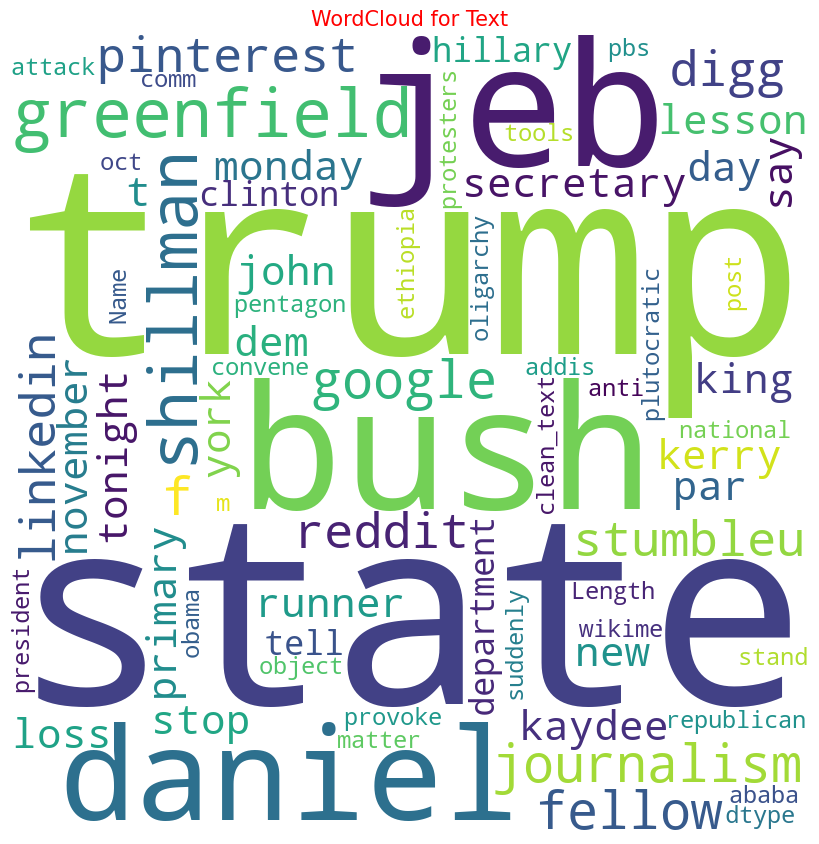

In [11]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                                min_font_size = 10).generate(str(df_clean.clean_text))
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("WordCloud for Text",c='r',fontsize = 15)
 
plt.show()

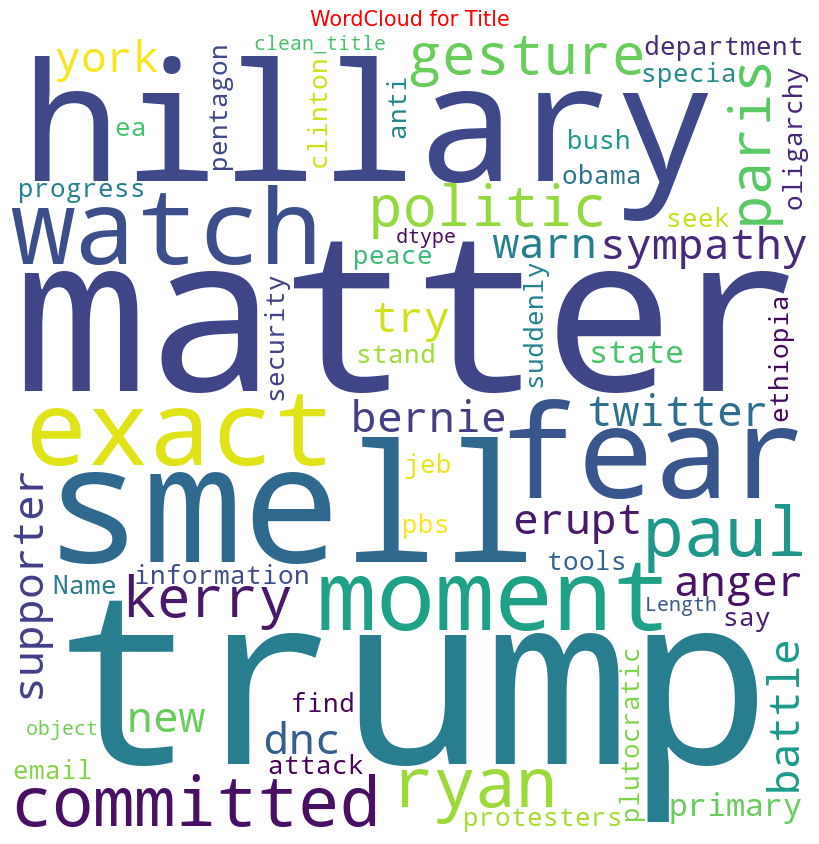

In [12]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                                min_font_size = 10).generate(str(df_clean.clean_title))
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("WordCloud for Title",c='r',fontsize = 15)
 
plt.show()

### Text Representation

In [13]:
df_clean['clean']=df_clean['clean_title'] + " "+ df_clean['clean_text']

In [14]:
df_clean = pd.DataFrame(df_clean['clean'])

In [15]:
df_clean

,clean
0,smell hillary fear daniel greenfield shillman ...
1,watch exact moment paul ryan committed politic...
2,kerry paris gesture sympathy secretary state j...
3,bernie supporter twitter erupt anger dnc try w...
4,battle new york primary matters primary day ne...
...,...
6330,state department say find email clinton specia...
6331,pbs stand plutocratic pentagon pbs stand pluto...
6332,anti trump protesters tools oligarchy informat...
6333,ethiopia obama seek progress peace security ea...


In [16]:
nlp(df_clean['clean'][0]).vector

array([ 0.03561492, -0.8584503 ,  0.06601695,  0.16910534, -0.1320637 ,
       -0.13549182,  0.31290346,  0.6821251 ,  0.14912571, -0.05255661,
        0.11787885,  0.18460357, -0.49427933, -0.7563562 , -0.26580206,
        0.28635514, -0.22292244, -0.31364104, -0.70915794, -0.3850803 ,
       -0.17745718,  0.58090425, -0.49625316,  0.07400888,  0.37630647,
       -0.00385816,  0.286505  ,  0.9193541 ,  0.3329306 ,  0.09257   ,
       -0.02750672, -0.19993496, -0.27101943,  0.2728511 , -0.24675013,
       -0.32119942,  0.46370864, -0.01153384, -0.11681809, -0.3197053 ,
       -0.46763834,  0.39152154, -0.08905325,  0.6664726 , -0.04824316,
        0.09694804,  0.05360269,  0.08625298, -0.33906943,  0.15323156,
       -0.5906348 ,  0.18633705,  0.33876428, -0.504167  , -0.6170768 ,
        0.02084489,  0.48466355,  0.11751468, -0.09597754, -0.02173109,
       -0.41537693, -0.06746293,  0.00278038, -0.4124317 , -0.3340426 ,
       -0.20212165,  0.24932851,  0.3669428 ,  0.11019868, -0.04

In [17]:
def text_vec(text):
    import spacy as spacy
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text).vector
    return doc

In [19]:
df_clean_vec = df_clean[['clean']]

In [20]:
df_clean_vec

,clean
0,smell hillary fear daniel greenfield shillman ...
1,watch exact moment paul ryan committed politic...
2,kerry paris gesture sympathy secretary state j...
3,bernie supporter twitter erupt anger dnc try w...
4,battle new york primary matters primary day ne...
...,...
6330,state department say find email clinton specia...
6331,pbs stand plutocratic pentagon pbs stand pluto...
6332,anti trump protesters tools oligarchy informat...
6333,ethiopia obama seek progress peace security ea...


In [21]:
df_clean_vec['vector']= df_clean_vec['clean'].parallel_apply(text_vec)

In [194]:
#df_clean_vec['taget'] =df['label']

In [22]:
df_final= df_clean_vec['vector']

In [23]:
df_final

0       [0.035614915, -0.8584503, 0.06601695, 0.169105...
1       [0.117049746, -0.8129551, 0.049537156, -0.0011...
2       [-0.114487186, -0.8874638, 0.020457106, 0.1150...
3       [0.05606768, -0.8551323, -0.023574065, 0.08421...
4       [0.08781178, -0.94072473, 0.15625125, 0.100540...
                              ...                        
6330    [-0.022049747, -0.9375206, -0.08574527, 0.1350...
6331    [0.00684053, -0.79328334, 0.030704295, 0.09328...
6332    [-0.035731338, -0.8474362, 0.08639188, 0.15009...
6333    [-0.030156787, -0.8405324, -0.003612929, 0.167...
6334    [0.011705745, -0.8533846, 0.12129541, 0.112961...
Name: vector, Length: 6335, dtype: object

In [25]:
df_final=pd.DataFrame([list(x) for x in df_final]).dropna()

In [26]:
df_final['target'] =df['label']

In [27]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,target
0,0.035615,-0.858450,0.066017,0.169105,-0.132064,-0.135492,0.312903,0.682125,0.149126,-0.052557,...,-0.344739,-0.963972,0.383719,0.076428,0.047171,1.054796,0.713131,-0.165816,0.067884,FAKE
1,0.117050,-0.812955,0.049537,-0.001197,-0.130516,-0.170149,0.258312,0.672962,0.087704,-0.085607,...,-0.325043,-0.877571,0.463222,0.047110,0.035014,1.010708,0.761704,-0.188389,0.048352,FAKE
2,-0.114487,-0.887464,0.020457,0.115083,-0.077006,-0.208996,0.320293,0.930936,0.103007,0.040463,...,-0.222533,-0.952821,0.639244,-0.037084,0.035398,0.923397,0.757955,-0.271325,0.123514,REAL
3,0.056068,-0.855132,-0.023574,0.084214,-0.010967,-0.198342,0.267208,0.894017,0.068495,0.034518,...,-0.299607,-0.999073,0.691038,-0.066690,0.099317,1.044791,0.721242,-0.261409,0.089187,FAKE
4,0.087812,-0.940725,0.156251,0.100540,-0.146001,-0.103093,0.188266,0.832031,0.047425,-0.066932,...,-0.411205,-1.026394,0.430973,-0.052627,0.096653,1.029400,0.735642,-0.299969,0.068934,REAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,-0.022050,-0.937521,-0.085745,0.135072,-0.270587,-0.047202,0.433809,1.080209,-0.012573,0.191705,...,-0.406326,-1.103402,0.478469,-0.108106,0.211289,1.065699,0.758625,-0.356483,0.034988,REAL
6331,0.006841,-0.793283,0.030704,0.093289,-0.125083,-0.167468,0.278266,0.537999,0.224616,-0.173895,...,-0.164496,-0.888343,0.534385,0.013948,0.167222,1.069479,0.774833,-0.158774,0.023590,FAKE
6332,-0.035731,-0.847436,0.086392,0.150100,-0.116247,-0.071143,0.332670,0.646273,0.156171,-0.066256,...,-0.353572,-0.939591,0.428922,-0.017066,0.167879,1.023469,0.784153,-0.238206,0.035888,FAKE
6333,-0.030157,-0.840532,-0.003613,0.167838,-0.085420,-0.171875,0.421122,0.773303,0.204019,0.022248,...,-0.307654,-0.944213,0.515440,0.006544,0.092848,1.009768,0.747126,-0.189365,0.058615,REAL


In [28]:
X=df_final.drop(columns='target')

In [29]:
y = df_final['target']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [31]:
mms = MinMaxScaler()
rbs = RobustScaler()

In [32]:
X = pd.DataFrame(rbs.fit_transform(X))

In [33]:
X=pd.DataFrame(mms.fit_transform(X))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
rfc = RandomForestClassifier(max_depth=3)
#dc = DecisionTreeClassifier()
#knc = KNeighborsClassifier()

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [38]:
pred_no_scale_test = rfc.predict(X_test)
pred_no_scale_train = rfc.predict(X_train)

In [39]:
print("Test",accuracy_score(y_test,pred_no_scale_test))
print("Train",accuracy_score(y_train,pred_no_scale_train))

Test 0.7049258727881397
Train 0.7236098020735156


In [40]:
print(classification_report(y_test,pred_no_scale_test))

              precision    recall  f1-score   support

        FAKE       0.74      0.66      0.70      1071
        REAL       0.68      0.75      0.71      1020

    accuracy                           0.70      2091
   macro avg       0.71      0.71      0.70      2091
weighted avg       0.71      0.70      0.70      2091



In [41]:
print(confusion_matrix(y_test,pred_no_scale_test))

[[708 363]
 [254 766]]
